# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import RandomForestClassifier
import joblib
import re

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan desc
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

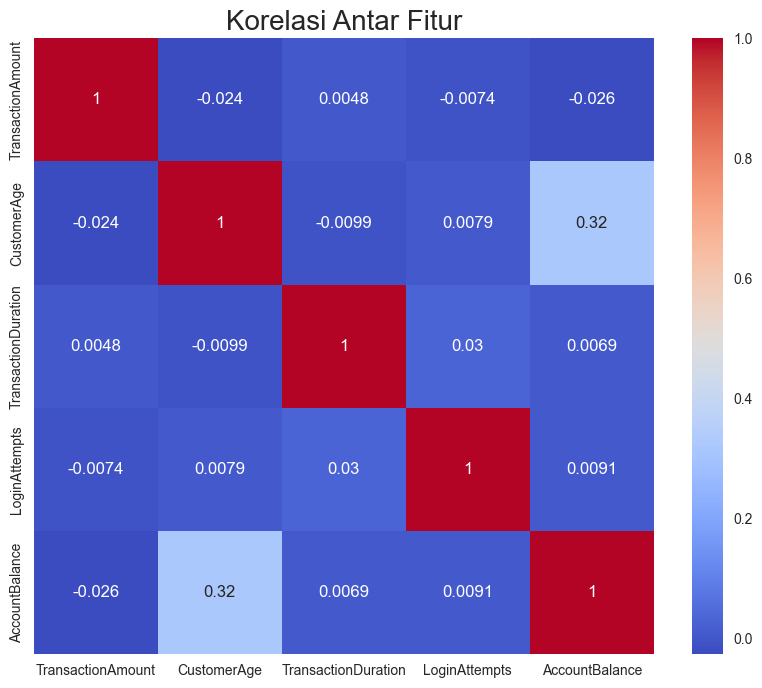

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr( numeric_only=True),annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur', fontsize=20)
plt.show()

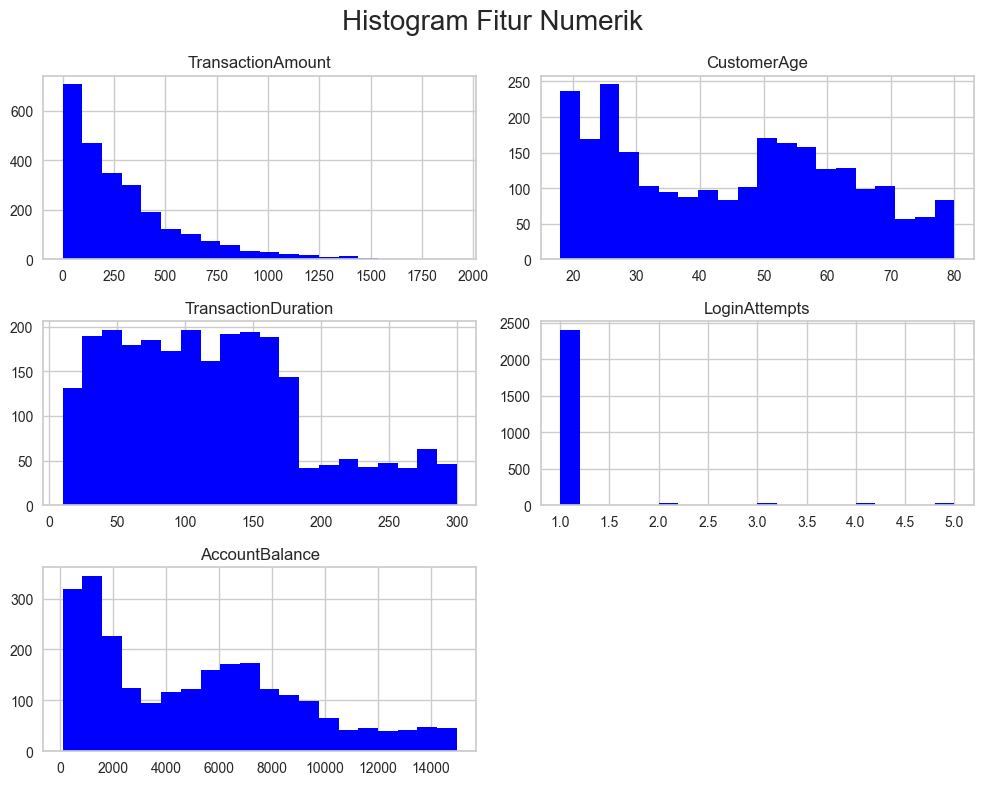

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=20, figsize=(10,8), color='blue')
plt.suptitle('Histogram Fitur Numerik', fontsize=20)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

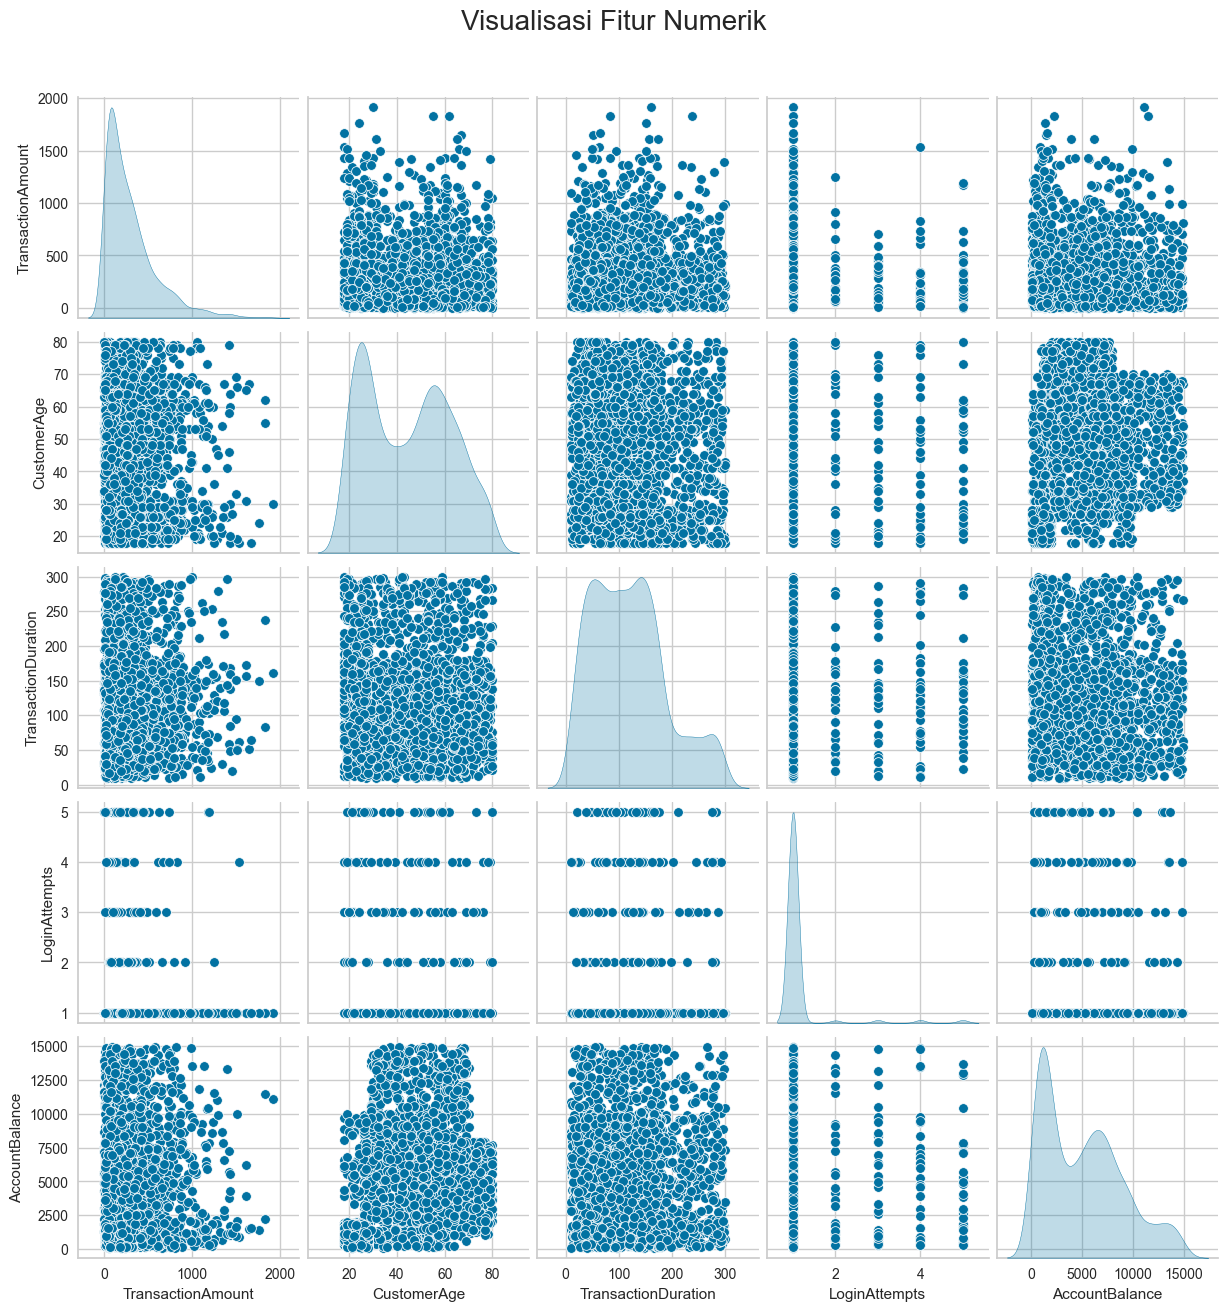

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Visualisasi Fitur Numerik', y=1.05, fontsize=20)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
text_col = df.columns[df.dtypes == 'object'][0]  # Ambil kolom pertama bertipe object
label_col = df.columns[df.dtypes == 'object'][1]  # Ambil kolom kedua bertipe object

print("Kolom teks:", text_col)
print("Kolom label:", label_col)

# Mengecek dataset menggunakan isnull().sum()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"https?://\S+|www.\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^A-Za-z0-9]+", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\b\w{1,3}\b", "", text)
    text =  re.sub(r'\@\w+', '', text)
    return text

df['Cleaned'] = df[text_col].astype(str).apply(clean_text)
df.isnull().sum()

Kolom teks: TransactionID
Kolom label: AccountID


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
Cleaned                     0
dtype: int64

In [9]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [10]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['Cleaned'])

In [11]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# Feature Encoding
le =  LabelEncoder()
df['Label_Encoded'] = le.fit_transform(df[label_col])  
print('setelah label encoding:')
print(df.head())

setelah label encoding:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doct

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_cols =  df.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print('setelah feature scaling:')
print(df.head())

setelah feature scaling:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128           0.007207  2023-04-11 16:29:14   
1      TX000002   AC00455           0.195940  2023-06-27 16:44:19   
2      TX000003   AC00019           0.065680  2023-07-10 18:16:08   
3      TX000004   AC00070           0.096016  2023-05-05 16:32:11   
4      TX000005   AC00411           0.006874  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710             Doc

In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
cols_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()]
df.drop(cols_to_drop, inplace=True, axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cleaned,Label_Encoded
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,tx000001,0.254545
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,tx000002,0.909091
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,tx000003,0.036364
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,tx000004,0.137374
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,tx000005,0.820202


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
print(df.columns.tolist()) # df.columns.tolist()

['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Cleaned', 'Label_Encoded']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean            0.154987     0.430297             0.377320       0.030405   
std             0.152295     0.287699             0.241650       0.148617   
min             0.000000     0.000000             0.000000       0.000000   
25%             0.042239     0.145161             0.182759       0.000000   
50%             0.110014     0.435484             0.351724       0.000000   
75%             0.215152     0.661290             0.520690       0.000000   
max             1.000000     1.000000             1.000000       1.000000   

       AccountBalance  Label_Encoded  
count     2510.000000    2537.000000  
mean         0.336914       0.502012  
std          0.262018       0.291794  
min          0.000000       0.000000  
25%          0.094340       0.248485  
50%          0.311416       0.511111  
75%          0.508945       0.751

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


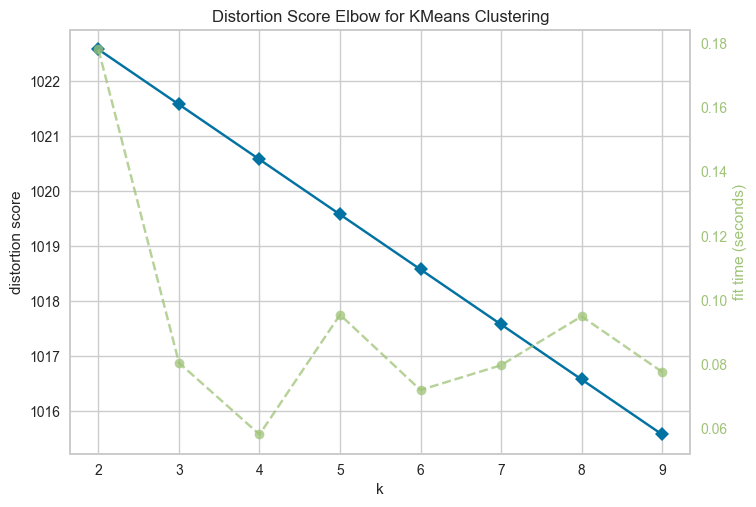

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X_array = X_text.toarray()
kmeans_model = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(2,10))
elbow_visualizer.fit(X_array)
elbow_visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_array)
df['Cluster'] = clusters

In [22]:
# Silhouette Score
sil_score = silhouette_score(X_array, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.42650204911482487


Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [25]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Membangun model menggunakan PCA.

In [27]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
print(df.groupby('Cluster').size())
print(df.groupby('Cluster')[df.select_dtypes(include=np.number).columns].agg(['mean', 'min', 'max']))


Cluster
0    2533
1       1
2       1
3       1
4       1
dtype: int64
        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0                0.155126  0.000000  1.000000    0.429751  0.000000  1.000000   
1                0.106507  0.106507  0.106507    0.548387  0.548387  0.548387   
2                0.053443  0.053443  0.053443    0.935484  0.935484  0.935484   
3                0.072064  0.072064  0.072064    0.677419  0.677419  0.677419   
4                0.038007  0.038007  0.038007    0.935484  0.935484  0.935484   

        TransactionDuration                     LoginAttempts  ...       \
                       mean       min       max          mean  ...  max   
Cluster                                                        ...        
0                  0.377365  0.000000  1.000000      0.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0 (Nasabah Umum Mayoritas)**:
   - **Rata-rata (mean) CustomerAge:** 0.429 (setelah inverse dapat ditaksir sebagai usia produktif)
   - **Rata-rata TransactionAmount:** 0.15 (aktivitas sedang)
   - **Analisis:** Cluster ini merupakan segmen terbesar dengan karakteristik rata-rata dari semua fitur. Dapat dijadikan target utama untuk promosi umum.

2. **Cluster 1 (Nasabah Tunggal, Interaksi Rendah)**:
   - **Rata-rata (mean) CustomerAge:** 0.548
   - **Rata-rata TransactionAmount:** 0.106
   - **Analisis:** Hanya 1 nasabah di cluster ini, kemungkinan besar merupakan outlier. Perlu analisis lebih lanjut.

3. **Cluster 2 (Nasabah Usia Tua, Transaksi Kecil)**:
   - **Rata-rata (mean) CustomerAge:** 0.935
   - **Rata-rata TransactionAmount:** 0.053
   - **Analisis:** Didominasi pelanggan senior yang sangat jarang bertransaksi. Cocok untuk promosi layanan edukasi keuangan dan pensiun.

4. **Cluster 3 (Nasabah Usia Tengah, Transaksi Rendah)**:
   - **Rata-rata (mean) CustomerAge:** 0.677
   - **Rata-rata TransactionAmount:** 0.072
   - **Analisis:** Aktivitas cenderung pasif. Perlu didorong dengan program engagement atau retensi.

5. **Cluster 4 (Nasabah Baru/Pasif dengan Saldo Kecil)**:
   - **Rata-rata (mean) CustomerAge:** 0.935
   - **Rata-rata TransactionAmount:** 0.038
   - **Analisis:** Nasabah dengan karakteristik saldo dan transaksi sangat kecil. Direkomendasikan untuk kampanye onboarding.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clustering = df.copy()
df_clustering.rename(columns={'Cluster': 'Target'}, inplace=True)

In [30]:
# Simpan Data
df_clustering.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [32]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0 (Nasabah Umum Mayoritas)**:
   - **Rata-rata (mean) CustomerAge:** 0.429 → sekitar 35 tahun
   - **Rata-rata TransactionAmount:** 0.15 → sekitar 1.500.000 IDR
   - **Analisis:** Sebagian besar nasabah merupakan pekerja aktif dengan jumlah transaksi menengah. Cocok untuk penawaran kartu kredit dan cashback.

2. **Cluster 1 (Nasabah Tunggal, Interaksi Rendah)**:
   - **Rata-rata (mean) CustomerAge:** 0.548 → sekitar 42 tahun
   - **Rata-rata TransactionAmount:** 0.106 → sekitar 1.000.000 IDR
   - **Analisis:** Data tunggal yang mungkin outlier. Perlu evaluasi lanjutan.

3. **Cluster 2 (Nasabah Usia Tua, Transaksi Kecil)**:
   - **Rata-rata (mean) CustomerAge:** 0.935 → sekitar 65 tahun
   - **Rata-rata TransactionAmount:** 0.053 → sekitar 500.000 IDR
   - **Analisis:** Segmentasi untuk lansia, cocok untuk promosi pensiun dan tabungan jangka panjang.

4. **Cluster 3 (Nasabah Usia Tengah, Transaksi Rendah)**:
   - **Rata-rata (mean) CustomerAge:** 0.677 → sekitar 50 tahun
   - **Rata-rata TransactionAmount:** 0.072 → sekitar 700.000 IDR
   - **Analisis:** Segmentasi pasif, bisa ditargetkan dengan loyalty atau reward program.

5. **Cluster 4 (Nasabah Baru/Pasif dengan Saldo Kecil)**:
   - **Rata-rata (mean) CustomerAge:** 0.935 → sekitar 65 tahun
   - **Rata-rata TransactionAmount:** 0.038 → sekitar 300.000 IDR
   - **Analisis:** Fokus pada retensi dan onboarding pelanggan baru atau lama yang pasif.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)